In [1]:
#--------------------------------------Python Modules------------------------------------------
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *
import numpy as np
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=np.nan)
from scipy import *

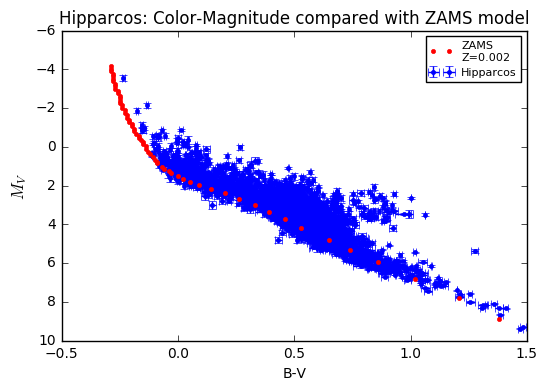

In [190]:
#-------------------------------------- Problem 2 ------------------------------------------

Hipparcos = np.loadtxt("P2/hipparcos.dat", skiprows = 2)

Hip_parallax = np.transpose(Hipparcos)[0]        # milli-arcsecs
Hip_parallax_error =  np.transpose(Hipparcos)[1] # milli-arcsecs
Hip_app_mag_v =  np.transpose(Hipparcos)[2]          # mags
Hip_color_BV = np.transpose(Hipparcos)[3]        # mags
Hip_color_BV_error = np.transpose(Hipparcos)[4]  # mags

#--------------------------------------App. Mag to Abs. Mag ------------------------------------------
#distance ~ 1 / parallax in arcsec

p = Hip_parallax/1000 #milliarcsec -> arcsec
pe = Hip_parallax_error/1000

Hip_distance = 1 / p 

# error propagation for distance
# Sig_d = Sig(1/p) = | d(1/p) / dp| *Sig_p = Sig_p / p^2

Hip_distance_error = pe / ((p)**2)

Hip_Abs_Mag_V = -(5 * np.log10( Hip_distance / 10)) + Hip_app_mag_v

#Error Propagation for Mag
# say x = distance
# Sig_M = [ d(5*log(x)+ m) / dx ] * Sig_x = [ 5 / (x*log(10)) ] * Sig_x

Hip_Abs_Mag_V_error = ((5*pe) / (Hip_distance*np.log(10)*(p)**2)) #app_mag not a function of distance, derivative goes to 0

ZAMS = np.loadtxt("P2/zams_02.dat", skiprows = 4)

zams_mass = np.transpose(ZAMS)[0]
zams_MV = np.transpose(ZAMS)[1]
zams_BV = np.transpose(ZAMS)[2]

plt.errorbar(Hip_color_BV, Hip_Abs_Mag_V, yerr=Hip_Abs_Mag_V_error,xerr=Hip_color_BV_error, marker='.', linestyle='None', label='Hipparcos')
plt.plot(zams_BV, zams_MV, marker='.', linestyle='None', color='red',label = "ZAMS"+"\n"+"Z=0.002")
plt.gca().invert_yaxis()
plt.xlabel('B-V')
plt.ylabel("$M_V$", fontsize=12)
plt.title("Hipparcos: Color-Magnitude compared with ZAMS model")
plt.legend(loc="best",fontsize=8)
pylab.savefig("P2/Hipparcos-ZAMS_color-mag.png")
plt.show()

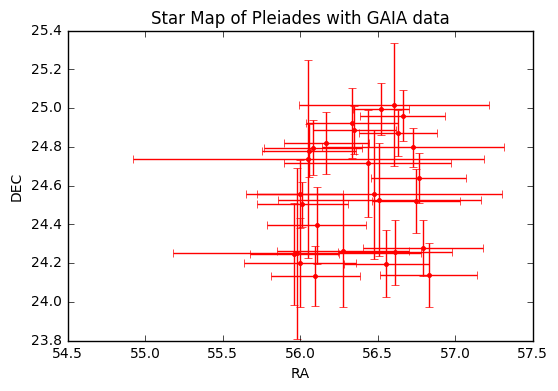

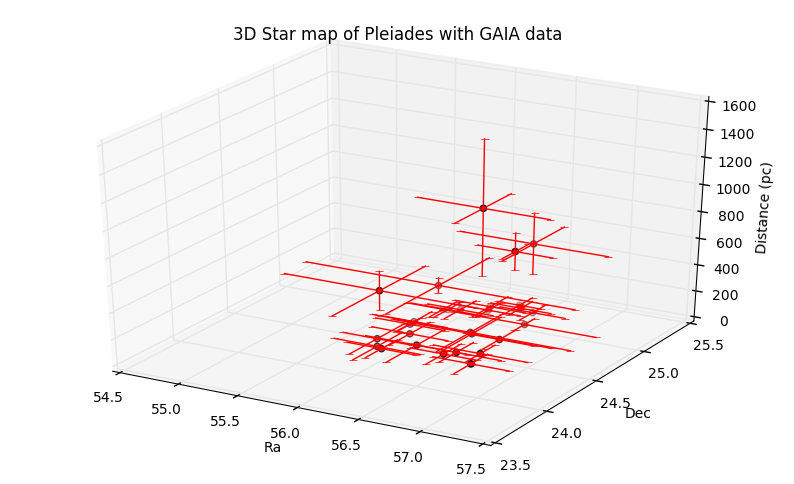

Average distance of Gaia data to pleaiades (parsecs): 222.154691769 +/- 42.9052349274

Compared to Hipparcos average derived distance (parsecs): 59.7210512324 +/- 3.32876569829

max GAIA pleiades distance (pc): 978.166966475

max Hipparcos Pleiades distance (pc): 99.9000999001


In [372]:
#-------------------------------------- Problem 3 ------------------------------------------
# On GAIA website, using:
# RA =56.85 deg
# DEC = 24.1167 deg
# Radius = 55 arcmin
# conditions:
# parallax >= 0, RA <= 56.85, DEC >= 24.1167

myFile = open("P3/1505753730446O-result.csv", "r")


myString = myFile.read()

myList = myString.split('NOT_AVAILABLE')
myList = myString.split('\n')

# print myList

pleiades = np.genfromtxt("P3/1505753730446O-result.csv",delimiter=',',dtype=None, skip_header=1)

# sourceid = pleiades; print sourceid[0][0]
source_id = []; ra = []; ra_error=[]; dec=[]; dec_error=[]; parallax=[]; parallax_error=[]
phot_g_mean_mag=[]; #phot_variable_flag returned a "NOT_AVAILABLE" flag.
for ii in range(len(pleiades)):
    source_id.append(pleiades[ii][0])
    ra.append(pleiades[ii][1])
    ra_error.append(pleiades[ii][2])
    dec.append(pleiades[ii][3])
    dec_error.append(pleiades[ii][4])
    parallax.append(pleiades[ii][5]) #in milliarcsec
    parallax_error.append(pleiades[ii][6])
    phot_g_mean_mag.append(pleiades[ii][7])

parallax = np.array(parallax)/1000 # in arcsec
parallax_error = np.array(parallax_error)/1000 
#Distance = 1 / parallax

pleiades_distance = 1 / parallax
# error propagation for distance
# Sig_d = Sig(1/p) = | d(1/p) / dp| *Sig_p = Sig_p / p^2
pleiades_distance_error = (parallax_error) / (parallax**2)


#Plot map of stars (distance should be one axis) <--- Does this mean 3d plot? RA,DEC vs distance???

plt.errorbar(ra, dec, xerr=ra_error, yerr=dec_error, marker='.',linestyle='none', color='red')
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Star Map of Pleiades with GAIA data")
plt.show()


#3D plot with distances
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=ra, ys=dec, zs=pleiades_distance, zdir='z', s=20, c='r',marker='o', linestyle='-', depthshade=True)
ax.set_xlabel("Ra")
ax.set_ylabel("Dec")
ax.set_zlabel("Distance (pc)")
ax.set_title("3D Star map of Pleiades with GAIA data")

#Plotting 3D Errorbars by drawing lines
for i in np.arange(0, len(pleiades_distance)):
    ax.plot([ra[i]+ra_error[i], ra[i]-ra_error[i]], [dec[i], dec[i]], [pleiades_distance[i], pleiades_distance[i]], marker="_", color='red')
    ax.plot([ra[i], ra[i]], [dec[i]+dec_error[i], dec[i]-dec_error[i]], [pleiades_distance[i], pleiades_distance[i]], marker="_", color='red')
    ax.plot([ra[i], ra[i]], [dec[i], dec[i]], [pleiades_distance[i]+pleiades_distance_error[i], pleiades_distance[i]-pleiades_distance_error[i]], marker="_", color='red')

pylab.savefig("P3/Gaia_Pleiades_3D_map.png")
plt.show()

print "Average distance of Gaia data to pleaiades (parsecs):", np.mean(pleiades_distance), "+/-", np.mean(pleiades_distance_error)
print ""
print "Compared to Hipparcos average derived distance (parsecs):", np.mean(Hip_distance), "+/-", np.mean(Hip_distance_error)
print ""
print "max GAIA pleiades distance (pc):", np.max(pleiades_distance)
print ""
print "max Hipparcos Pleiades distance (pc):", np.max(Hip_distance)

                                PROBLEM 4


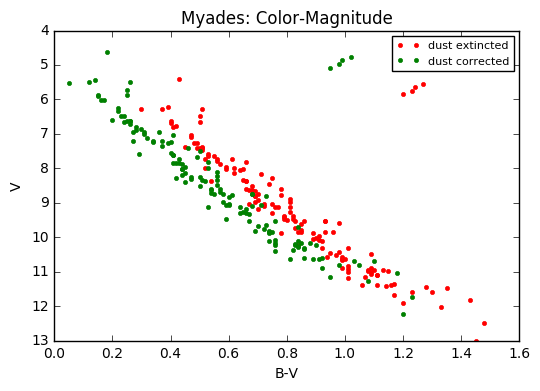

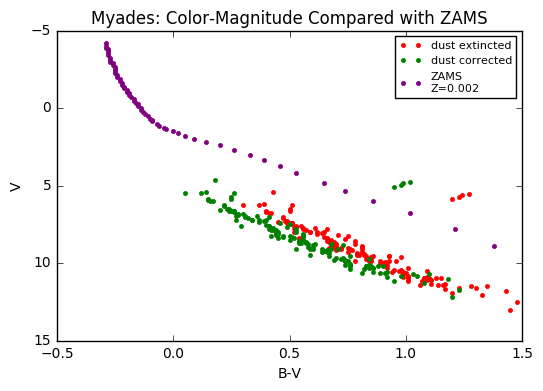

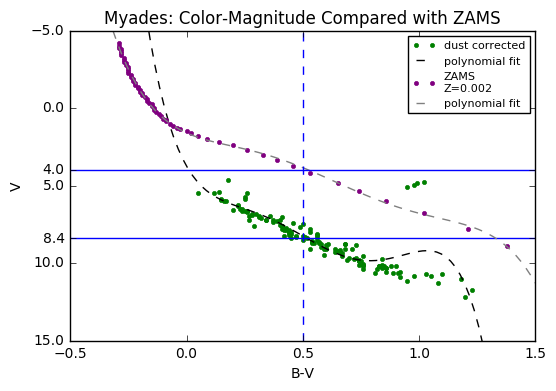

distance modulus: 4.4045
distance from Main Sequence Fitting: 76.0151225499 parsecs


In [312]:
#-------------------------------------- Problem 4 ------------------------------------------
print "                                PROBLEM 4"
#Part A: Plot dust corrected color-mag  diagram

myades = np.loadtxt("P4/myades.dat", skiprows=2)
myades_V = np.transpose(myades)[0]
myades_BV = np.transpose(myades)[1]

# plt.plot(myades_V, myades_BV, marker='.', linestyle='None', color='red')
# plt.gca().invert_yaxis()
# plt.xlabel('B-V')
# plt.ylabel('V')
# plt.title("Myades: Color-Magnitude, non-dust corrected")
# #plt.legend(loc="best",fontsize=8)
# # pylab.savefig("P2/Hipparcos-ZAMS_color-mag.png")
# plt.show()

#-------------------------------------- dust correction ------------------------------------------

# E(B-V) = (B-V)_observed - (B_V)_theoretical = A_B - A_V
# For this dataset, E(B-V) = 0.25 mag
# (B_V)_theoretical = (B-V)_observed - E(B-V)  <--- True Color

E_BV = 0.25

#Using a Standard Extinction Law" R_v = A_V / E(B-V) where A_V = V - V_0
# R_V ~ 3.1 If we used this, we can calculate A_V
# R_V = A_V / E(B-V) = A_V / (A_B- A_V)

A_V = E_BV*3.1
A_B = A_V+E_BV # = B-B_0

myades_V0 = myades_V -A_V ; V0 = myades_V0 

myades_B = myades_BV+myades_V

myades_B0 = myades_B - A_B ; B0 = myades_B0

plt.plot(myades_BV, myades_V,  marker='.', linestyle='None', color='red', label='dust extincted')
plt.plot(B0-V0,V0, marker='.', linestyle='None', color='green', label='dust corrected')
plt.gca().invert_yaxis()
plt.xlabel('B-V')
plt.ylabel('V')
plt.title("Myades: Color-Magnitude")
plt.legend(loc="best",fontsize=8)
pylab.savefig("P4/Myades_color-mag.png")
plt.show()

#-----------------------------------Compare with ZAMS------------------------------------------
plt.plot(myades_BV,myades_V,  marker='.', linestyle='None', color='red', label='dust extincted')
plt.plot(B0-V0,V0, marker='.', linestyle='None', color='green', label='dust corrected')
plt.plot(zams_BV, zams_MV, marker='.', linestyle='None', color='purple',label = "ZAMS"+"\n"+"Z=0.002")
plt.gca().invert_yaxis()
plt.xlabel('B-V')
plt.ylabel('V')
plt.title("Myades: Color-Magnitude Compared with ZAMS")
plt.legend(loc="best",fontsize=8)
pylab.savefig("P4/Myades_color-mag_withZAMS.png")
plt.show()


#----------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------

#Part B: Estimate Error in Distance

# error propagation for distance
# Sig_d = Sig(1/p) = | d(1/p) / dp| *Sig_p = Sig_p / p^2

#polynomial fits 
zams_fit = np.polyfit(zams_BV, zams_MV, 5)
zfit = np.poly1d(zams_fit)
x_newz = np.linspace(-0.5, 1.5, 100)
y_newz = zfit(x_newz)

myades_fit = np.polyfit((B0-V0), V0, 5) 
mfit = np.poly1d(myades_fit)
x_newm = np.linspace(-0.5, 1.5, 100)
y_newm = mfit(x_newm)


#plt.plot(myades_BV,myades_V,  marker='.', linestyle='None', color='red', label='dust extincted')
plt.plot(B0-V0,V0, marker='.', linestyle='None', color='green', label='dust corrected')
plt.plot(x_newm,y_newm, linestyle='--', color='black', label='polynomial fit')
plt.axhline(y=np.mean(V0))

plt.plot(zams_BV, zams_MV, marker='.', linestyle='None', color='purple',label = "ZAMS"+"\n"+"Z=0.002")
plt.plot(x_newz,y_newz, linestyle='--', color='grey', label='polynomial fit')
plt.axvline(x=np.mean(x_newz), linestyle='--')
plt.axhline(y=4) #would use y_newz but too many data points in upper left offsets it


plt.gca().invert_yaxis()
plt.xlabel('B-V')
plt.ylabel('V')
plt.title("Myades: Color-Magnitude Compared with ZAMS")
plt.ylim(15,-5)
plt.legend(loc="best",fontsize=8)
extraticks=[np.mean(V0),4]
plt.yticks(list(plt.yticks()[0]) + extraticks)


pylab.savefig("P4/Myades_color-mag_withZAMS_distance_modulus.png")
plt.show()

dist_mod = -4 + np.mean(V0)
print "distance modulus:", dist_mod

#m-M = dist_mod = 5log_10(d/10)
D = 10*(10**(np.array(dist_mod)/5)); print "distance from Main Sequence Fitting:", D, "parsecs"

Number of data points: 998
average Del_M_r(Z) -2269985.39701
Average M0_r: -0.0117753394922
Average of distances to stars in M5 cluster =  inf (parsecs)
Average M - m value: 1836704.58199


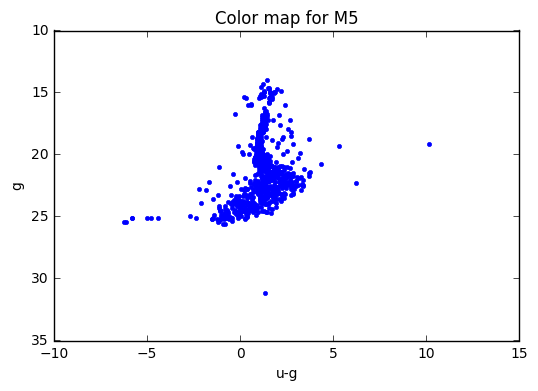

In [371]:
#-------------------------------------- Problem 5 ------------------------------------------

GC_M5 = np.genfromtxt("P5/Skyserver_SQL9-19-2017 8-46-27 PM.csv", skip_header=2, delimiter=",")

objid = np.transpose(GC_M5)[0]
ra = np.transpose(GC_M5)[1]
dec = np.transpose(GC_M5)[2]
u = np.transpose(GC_M5)[3]
g =np.transpose(GC_M5)[4]
r = np.transpose(GC_M5)[5]
i = np.transpose(GC_M5)[6]
z = np.transpose(GC_M5)[7]

print "Number of data points:", len(ra)
# From Ivezic et al 2008, eq Appendix I:
# Delta M_r ([Fe/H]) = 4.5-1.11[Fe/H] -0.18[Fe/H]^2
# M0_r(g-i) = -5.06 +4.32(g-i) -12.97(g-i)^2 +6.127(g-i)^3-1.267(g-i)^4+0.0967(g-i)^5

# M_r(g-i, [Fe/H]) = M0_r(g-i)+Delta M_r

# x = (u-g) for g-r <= 0.4
# x = (u-g)-2(g-r)+0.8 for (g-r) > 0.4
# y = g-r 

# from eq 4:
# [Fe/H] = A + BX + CY + DXY + EX^2 + FY^2 + GX^2 + HXY^2 + IX^3 +JY^3
A = 4.37; B = -8.56; C = 15.5; D = -39; E=23.5; F= 20.3; G = 12.1; H = 7.33; I = -10.1; 
J = -21.4

distance = []; MagDiff = []; d = []; M0_r = []; Del_M_r_Z = []
for ii in range(0,len(ra)):
    Y = g[ii]-r[ii]
    if (g[ii]-r[ii]) <= 0.4:
        X = (u[ii]-g[ii])
    else:
        X = (u[ii]-g[ii]) - 2*(g[ii]-r[ii])+0.8
    Z = A + B*X + C*Y + D*X*Y + E*(X**2) + F*(Y**2) + G*(X**2) + H*X*(Y**2) + I*(X**3) +J*(Y**3)

    Del_M_r_ftnof_Z = 4.5 - 1.11*Z - 0.18*(Z**2)
    Del_M_r_Z.append(Del_M_r_ftnof_Z)
    x = (g[ii]-i[ii])
#    if x > 0.2 and x < 4:
    #From Appendix 1, eq A7
#        M0_r_ftnof_gminusi = -5.06 + 4.32*(x) -12.97*(x**2)+6.127*(x**3)-1.267*(x**4)+0.0967*(x**5)
    #^^^^ This gives a number so large python thinks its infinite. Try eq A1 instead:
    if x > 0.3 and x <= 1:
        M0_r_ftnof_gminusi = -2.85 + 6.29*x - 2.3*x**2 #<---- Still produces infinite distance. :'(   
        M0_r.append(M0_r_ftnof_gminusi)
        M_r = M0_r_ftnof_gminusi + Del_M_r_ftnof_Z
        mu = r[ii]-M_r
        MagDiff.append(mu)
#        d = 10*(10**(np.array(MagDiff)/5.0)) #parsecs
        d = 10*(10**(mu/5.0)) #parsecs
        distance.append(d)
    
#print dist_modulus


print "average Del_M_r(Z)", np.mean(Del_M_r_Z)
print "Average M0_r:", np.mean(M0_r)

print "Average of distances to stars in M5 cluster = ", np.mean(distance), "(parsecs)"
print "Average M - m value:", np.mean(MagDiff)


plt.plot((u-g),g, marker='.',linestyle='none')
plt.xlabel("u-g")
plt.ylabel("g")
plt.gca().invert_yaxis()
plt.title("Color map for M5")
# plt.ylim(21,14)
# plt.xlim(0.6,1.3)
plt.show()



In [153]:
np.argwhere(np.isinf(MagDiff))
print ""


print (MagDiff)[0:10]


[117.38067205112415, 62.228772608412825, 99.466872668830646, 83.454301981497764, 48.966209281011032, 47.95660770564681, 87.658355199492917, 9585704.5800050665, 76.817072304628169, 65.30433884503185]
